### GROUP No. 26
-DATASET : Anomaly Detection

### Group Members:
- Neha Mugloo(2022dc04504)
- Vinayak Mittal(2022dc04167)

In [46]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import streamlit as st
import warnings

In [47]:
warnings.filterwarnings("ignore")

In [15]:
#Python 3.11.4 required
!pip install -r requirements.txt

In [48]:
#Reading the dataset
df = pd.read_csv('Anamoly.csv')
#Sanity check
print("First two rows of the dataset:")
df.head(2)

First two rows of the dataset:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [49]:
#Size of dataframe
df.shape

(22544, 40)

In [50]:
#Printing the columns and the related info like data type, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted    

In [51]:
#Identifying count of distinct data for each attribute
df.nunique() 

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    75
diff_srv_rate               

In [52]:
#To check for null data in the dataset
df.isnull().any() 

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
srv_rerror_rate                False
same_srv_rate                  False
d

In [53]:
#Count the no. of null values in the columns
df.isna().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

- As we can see there are two columns containing null values, so this needs to be handled. This is taken care of in data pre-processing section below.

In [54]:
# Checking if the target variable is present in the dataset
target_variable = 'class'  
if target_variable in df.columns:
    print("\nTarget variable '{}' is present in the dataset.".format(target_variable))
    print("Target variable values for the first two rows:")
    print(df[target_variable].head(2))
else:
    print("\nTarget variable '{}' is not present in the dataset.".format(target_variable))


Target variable 'class' is present in the dataset.
Target variable values for the first two rows:
0    anomaly
1    anomaly
Name: class, dtype: object


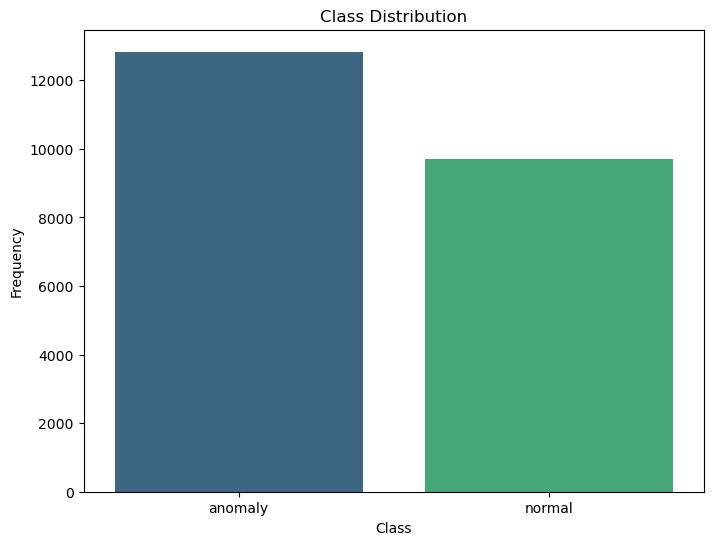

In [55]:
#Comment on class imbalance with appropriate visualization method.
class_counts = df['class'].value_counts()

#Creating a bar plot to visualize class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Class imbalance 

From the bar plot above, we can deduce that the distribution of class "anomaly" is higher than that of the class "normal". There is a class imbalance as the frequency of class "anomaly" has approximately 2500 more records than the class "normal".

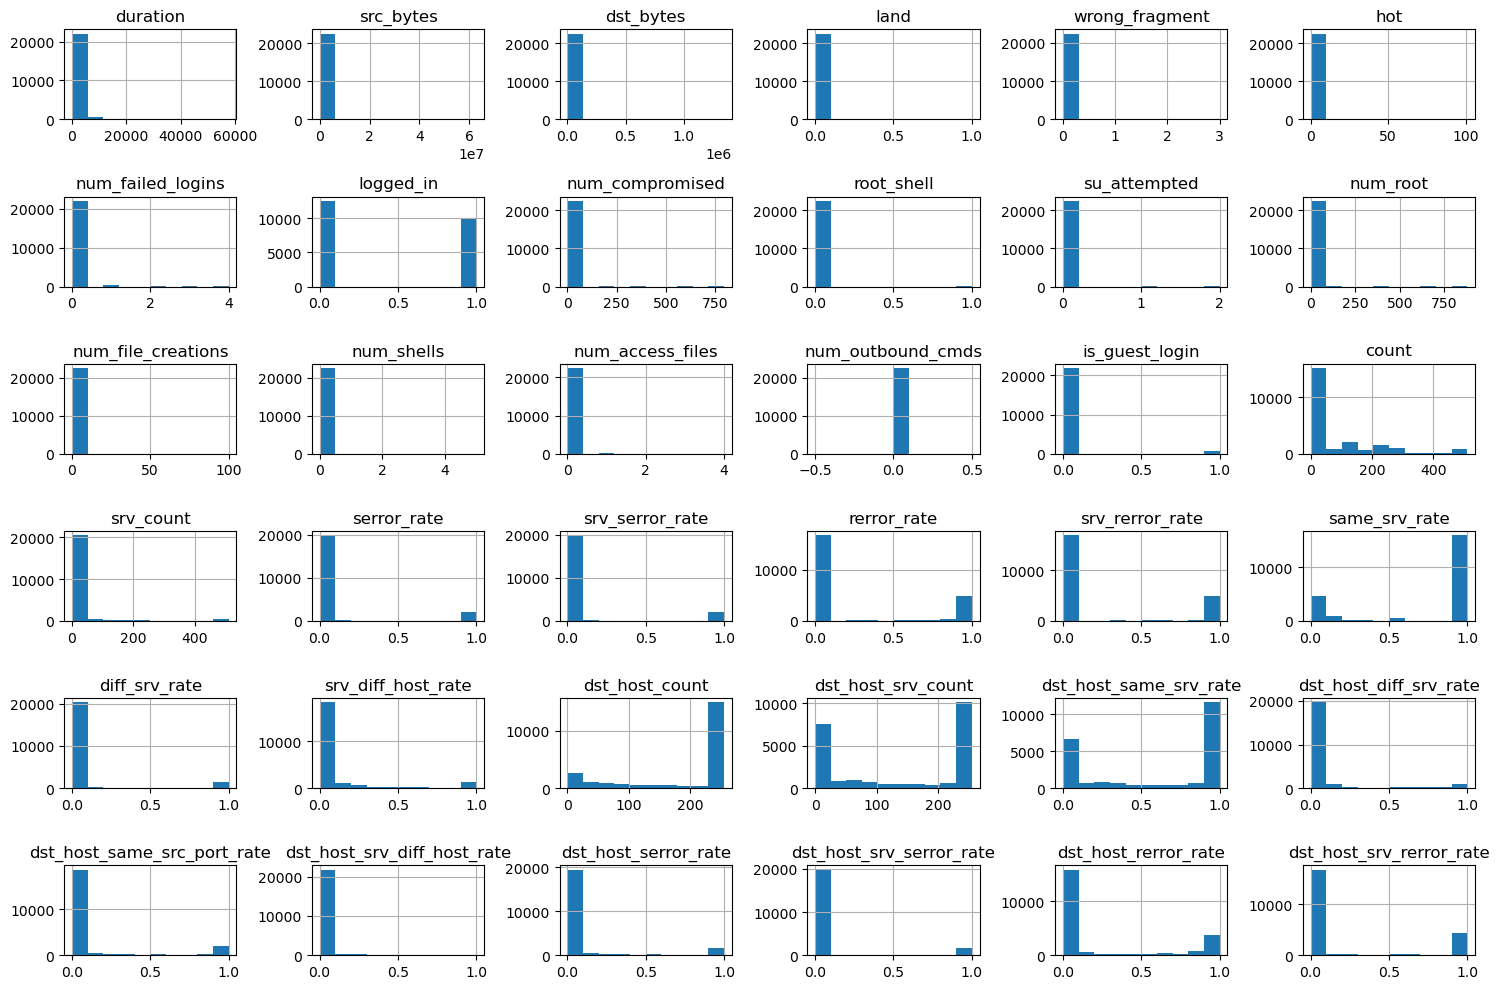

In [56]:
#Provide appropriate visualizations to get an insight about the dataset
# Plot histograms for each numerical feature
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

- The above histogram shows the distribution of different columns in the dataset.

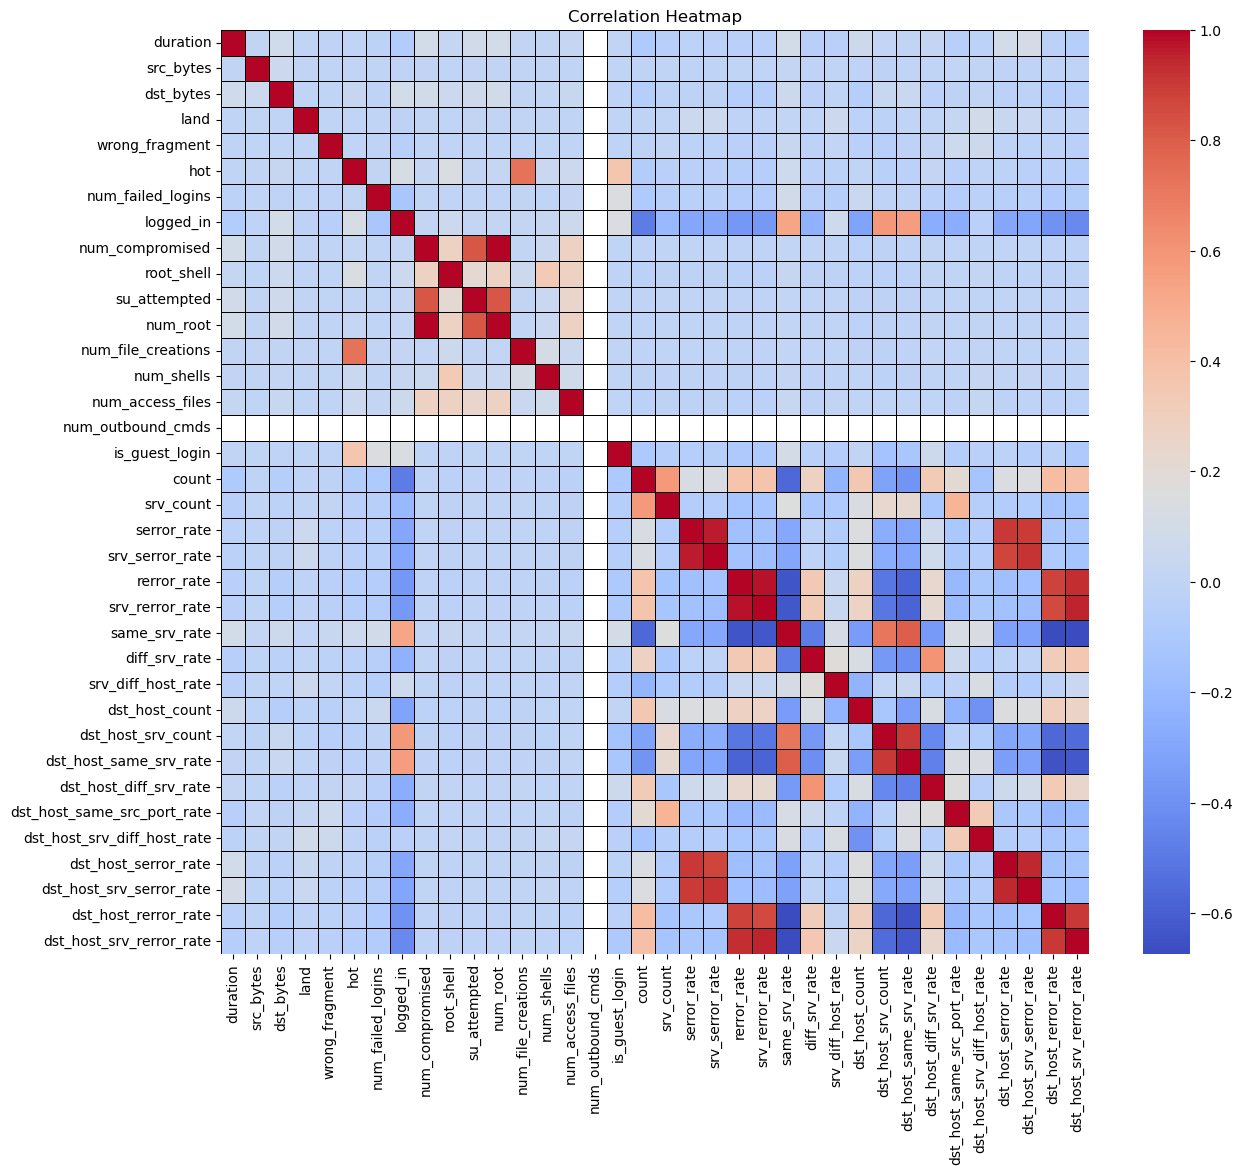

In [57]:
#Do the correlational analysis on the dataset. Provide a visualization for the same.

#Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linecolor='black', linewidths=0.6,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [58]:
#Checking for columns that have high correlation score
# Set the threshold value
threshold = 0.95
# Print correlation scores greater than the threshold for each column with every other column
for column in corr_matrix.columns:
    print(f"Correlation scores greater than {threshold} for column '{column}':")
    high_correlation_columns = corr_matrix[corr_matrix[column] > threshold][column]
    print(high_correlation_columns)
    print()

Correlation scores greater than 0.95 for column 'duration':
duration    1.0
Name: duration, dtype: float64

Correlation scores greater than 0.95 for column 'src_bytes':
src_bytes    1.0
Name: src_bytes, dtype: float64

Correlation scores greater than 0.95 for column 'dst_bytes':
dst_bytes    1.0
Name: dst_bytes, dtype: float64

Correlation scores greater than 0.95 for column 'land':
land    1.0
Name: land, dtype: float64

Correlation scores greater than 0.95 for column 'wrong_fragment':
wrong_fragment    1.0
Name: wrong_fragment, dtype: float64

Correlation scores greater than 0.95 for column 'hot':
hot    1.0
Name: hot, dtype: float64

Correlation scores greater than 0.95 for column 'num_failed_logins':
num_failed_logins    1.0
Name: num_failed_logins, dtype: float64

Correlation scores greater than 0.95 for column 'logged_in':
logged_in    1.0
Name: logged_in, dtype: float64

Correlation scores greater than 0.95 for column 'num_compromised':
num_compromised    1.00000
num_root       

### Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer.

Yes, correlational analysis can have a significant effect on feature selection.This analysis can help in :

1. **Identifying Redundant Features**: If two features are highly correlated (either positively or negatively), they may provide redundant information. In such cases, we can keep only one of the correlated features to simplify the model and reduce multicollinearity. For eg- From above heatmap and correlation scores calculated, we can see that columns having high correlation score(>0.95) are:
*num_root with num_compromised, srv_serror_rate with serror_rate, srv_rerror_rate with rerror_rate*

- This means that few of these columns are redundant here and we can remove them. Eg- num_compromised,srv_serror_rate, srv_rerror_rate can be removed and the columns num_root,srv_serror_rate and srv_rerror_rate can be retained.

2. **Improving Model Performance**: Highly correlated features can lead to overfitting in some machine learning models. By selecting features with lower inter-correlation, one can potentially improve the performance of the model on unseen data.


3. **Reducing Complexity**: Correlational analysis can help identify groups of features that exhibit strong correlations within themselves. In such cases, we can retain only one representative feature from each group, thus reducing the dimensionality of the dataset and making the model more interpretable and efficient.

- The impact of correlational analysis on feature selection also depends on various factors, including the nature of the dataset and the specific machine learning algorithms being used.

In [59]:
#Dropping the redundant columns as discussed above
redundant_cols = df[['num_compromised','srv_serror_rate','srv_rerror_rate']]
df_filtered = df.drop(columns=redundant_cols)
df_filtered.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


### Data pre-processing

1. **HANDLING MISSING/NULL VALUES**-
- As we observed above, there is missing data in our dataset, so we need to handle that in the data.
- Removing the null values is not a good idea as it  can lead to loss of valuable information from the dataset.
- So here will be imputing the missing/null values by the Median imputation technique. Median imputation is a method used to handle missing values in a dataset by replacing them with the median value of the feature (column) where the missing value occurs.
- By this, we will retain all the observations in the dataset and median imputation will also help to preserve the central tendency of the data without being influenced by extreme values.
- Since the dataset is also skewed as observed from the graph above, therefore median imputation is a better choice for skewed distributions.

In [60]:
#Filling null values by median imputation
median_dst_host_srv_count = df_filtered['dst_host_srv_count'].median()
df_filtered['dst_host_srv_count'].fillna(median_dst_host_srv_count,inplace =True)

median_dst_host_count = df_filtered['dst_host_count'].median()
df_filtered['dst_host_count'].fillna(median_dst_host_count,inplace =True)

In [61]:
df_filtered.isna().sum()
#Null values removed

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_s

In [62]:
#Checking for duplicate rows across all columns
duplicate_rows = df_filtered.duplicated()
#Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
num_duplicate_rows

3

2. **DUPLICATE RECORDS** - 
- There are 3 rows in the dataset that have duplicate records, hence we need to remove them.
- Duplicate rows can lead to inaccuracies in analysis and modeling and can hence create inconsistencies in the dataset, making it harder to interpret and analyze. 
- Removing these duplicates helps maintain data integrity and consistency.

In [63]:
#Drop these duplicate rows
df1 = df_filtered.drop_duplicates()
df1.shape

(22541, 37)

In [64]:
#statistical information of the above dataset
df1.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22541.000000,2.254100e+04,2.254100e+04,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,...,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000
mean,218.888204,1.039683e+04,2.056292e+03,0.000311,0.008429,0.105408,0.021649,0.442261,0.002440,0.000266,...,193.891087,140.785768,0.608803,0.090419,0.132279,0.019641,0.097821,0.099439,0.233288,0.226580
std,1407.267989,4.728179e+05,2.122070e+04,0.017620,0.142608,0.928489,0.150338,0.496666,0.049337,0.021061,...,94.030543,111.754762,0.435661,0.220482,0.306285,0.085399,0.273156,0.281883,0.387164,0.400802
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3. **IDENTIFYING OUTLIERS** - Outliers are data points that significantly differ from other observations in a dataset. They are  unexpected values as compared to the majority of the data points. 
- We need to identify the outliers in the dataset. 
- Here, we have used the z score method to identify outliers
- The z-score method is a statistical technique used to identify outliers in a dataset by quantifying how many standard deviations a data point is away from the mean of the dataset.

In [65]:
#Identifying outliers in the columns
obj_columns = ['protocol_type','service','flag','class']
# Select only numerical columns
numerical_columns = df1.select_dtypes(include=['number'])

# Calculate z-scores for each numerical column
z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()

# Define threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers based on z-scores
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print rows with outliers
print("Rows with outliers:")
df1[outliers.any(axis=1)]

Rows with outliers:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28.0,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,1,...,255.0,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,anomaly
9,0,tcp,ftp,SF,26,157,0,0,0,1,...,26.0,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,anomaly
11,0,tcp,smtp,SF,616,330,0,0,0,0,...,129.0,0.51,0.03,0.00,0.00,0.00,0.00,0.33,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22519,8209,tcp,telnet,SF,0,15,0,0,0,0,...,9.0,0.04,0.85,0.00,0.00,0.00,0.00,0.84,0.00,anomaly
22520,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.14,0.00,0.00,0.04,0.00,0.85,1.00,anomaly
22521,0,udp,private,SF,1,1,0,0,0,0,...,1.0,0.00,0.54,0.97,0.00,0.00,0.00,0.03,0.00,anomaly
22531,0,tcp,private,S0,0,0,0,0,0,0,...,12.0,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


- Since there are many rows having outliers, to remove these outliers is not a feasible solution as it can lead to loss of data.
- One way to handle these outliers is to impute the outliers by Median of the columns
- First, we will replace the outliers with NaN values and then do the median imputation

In [66]:
df1[outliers] =np.nan
median_values = df1.median()
df1.fillna(median_values, inplace=True)
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0.0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.0,icmp,eco_i,SF,20.0,0.0,0.0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,anomaly
4,1.0,tcp,telnet,RSTO,0.0,15.0,0.0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


4. **SKEWNESS OF THE DATA** - Skewness is the degree of asymmetry observed in a dataset. 
- It indicates the degree to which the values in a dataset deviate from symmetry around the mean.

In [67]:
#Checking if the data is skewed
#Calculating skewness for each numerical column
skewness = numerical_columns.skew()
# Print skewness values
print("Skewness:")
print(skewness)

Skewness:
duration                        15.451782
src_bytes                      117.477722
dst_bytes                       47.499395
land                            56.723640
wrong_fragment                  19.251638
hot                             63.452479
num_failed_logins                7.739371
logged_in                        0.232528
root_shell                      20.171588
su_attempted                    85.447499
num_root                        91.219354
num_file_creations             143.230062
num_shells                      65.652846
num_access_files                25.714154
num_outbound_cmds                0.000000
is_guest_login                   5.674409
count                            1.909956
srv_count                        4.354109
serror_rate                      2.651605
rerror_rate                      1.211292
same_srv_rate                   -1.013433
diff_srv_rate                    2.999546
srv_diff_host_rate               2.815249
dst_host_count          

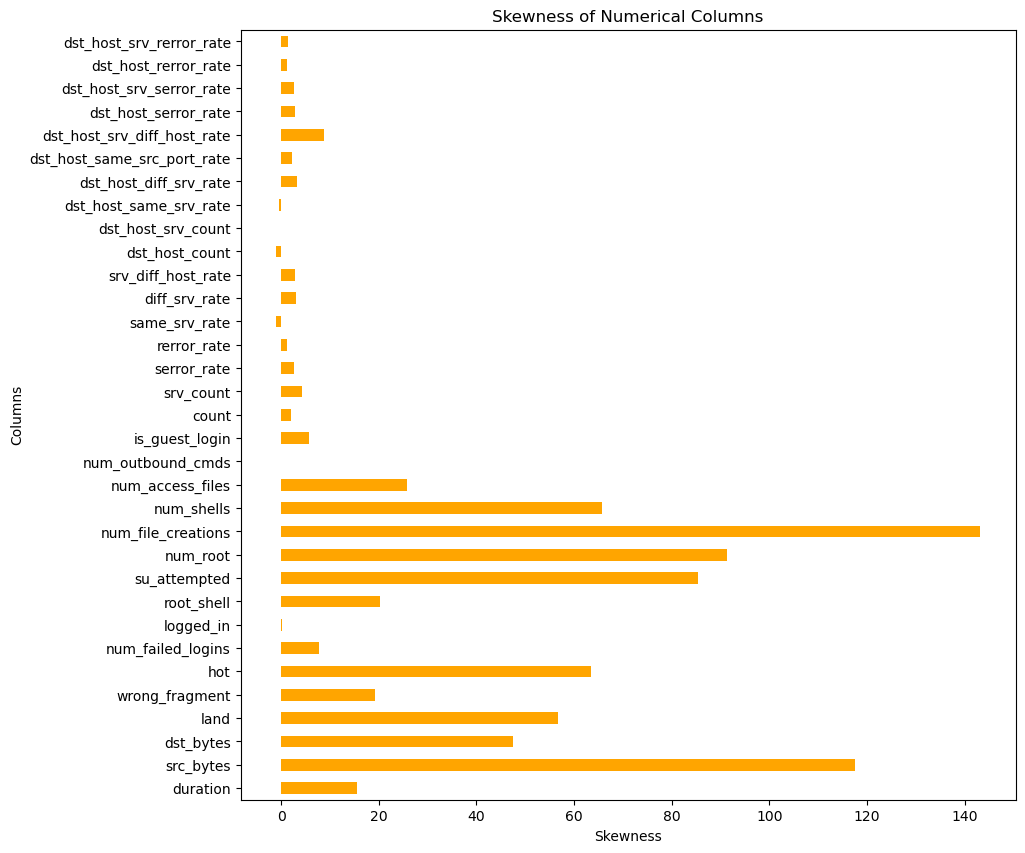

In [68]:
# Visualize skewness using histograms
plt.figure(figsize=(10, 10))
skewness.plot(kind='barh', color='orange')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Skewness')
plt.ylabel('Columns')
plt.show()

- Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.
- A skewness value closer to 0 indicates a more symmetric distribution.
- From the above graph, we can deduce that columns *num_outbound_cmds,logged_in,dst_host_srv_count, dst_host_same_srv_rate* have symmetric distribution(zero skewness), which means the data points are evenly distributed around the mean.
- Columns same_srv_rate, dst_host_count are left skewed(negative skewness).
- Rest of the columns are right-skewed having positive skewness, with the columns *num_file_creations and src_bytes* having highest asymmetrical distribution of data.

# Feature Engineering

In [69]:
#Segregating features and the target variable
X = df1.drop('class', axis=1)  # Features (all columns except 'Target')
y = df1['class']   

print('Features are:')
X.head()

Features are:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0.0,tcp,private,REJ,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0.0,0.0,0.0,0.0,...,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0.0,icmp,eco_i,SF,20.0,0.0,0.0,0.0,0.0,0.0,...,3.0,57.0,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00
4,1.0,tcp,telnet,RSTO,0.0,15.0,0.0,0.0,0.0,0.0,...,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [70]:
#Segregating numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical features are:")
categorical_features

Categorical features are:


['protocol_type', 'service', 'flag']

In [71]:
print("Numerical features are:")
numerical_features

Numerical features are:


['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'hot',
 'num_failed_logins',
 'logged_in',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [72]:
#We can apply one-hot encoding on the target variable i.e class
one_hot_encoded = pd.get_dummies(y)

#Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([y, one_hot_encoded], axis=1)

#Drop the original categorical column if needed
df_encoded.drop(columns=['class'], inplace=True)

#Print the resulting DataFrame after one-hot encoding
df_encoded.head()

,anomaly,normal
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


# Feature Transformation 

In [74]:
# Standardization (z-score normalization)
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Numerical features after Min-Max Scaling (Normalization):")
df_num = X[numerical_features]
df_num.head()

Numerical features after Min-Max Scaling (Normalization):


,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.039216,0.04,0.080000,0.00,0.000000,0.0,0.0,1.00,1.00
1,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.080000,0.00,0.000000,0.0,0.0,1.00,1.00
2,0.00054,0.010281,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.525490,0.337255,0.61,0.053333,0.61,0.074074,0.0,0.0,0.00,0.00
3,0.00000,0.000016,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011765,0.223529,1.00,0.000000,1.00,0.000000,0.0,0.0,0.00,0.00
4,0.00027,0.000000,0.000233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.337255,0.31,0.226667,0.03,0.074074,0.0,0.0,0.83,0.71


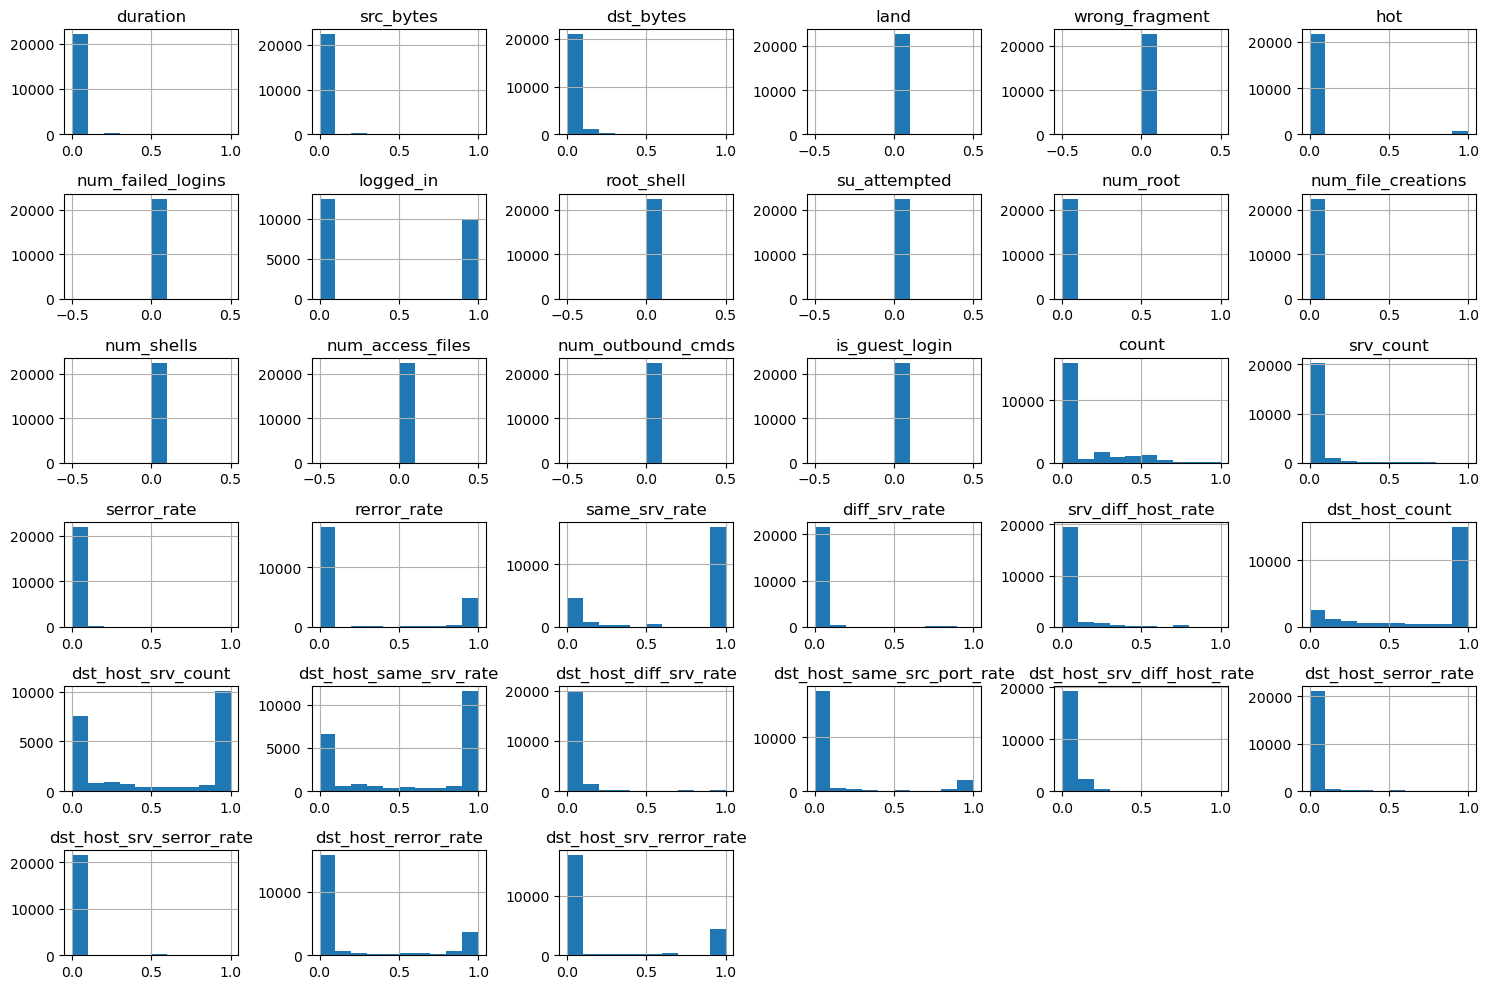

In [75]:
#Visualizations to get insight about the numerical features after scaling
# Plot histograms for each numerical feature
df_num.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

- The above histograms show distribution of numerical features across the dataset, post feature transformation

# Feature Selection for Random Forest Classifier

In [76]:
X = df_num # Features
y = df_encoded # Target variable

y = y.idxmax(axis=1)

rf_model = RandomForestClassifier(random_state=42)  

# Calculate feature importances without training the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 5 features
top_features = importance_df.nlargest(5, 'Importance')['Feature']

print("Top 5 features based on feature importance:")
top_features

Top 5 features based on feature importance:


1                  src_bytes
2                  dst_bytes
31      dst_host_rerror_rate
26    dst_host_diff_srv_rate
24        dst_host_srv_count
Name: Feature, dtype: object

In [77]:
X = df_num[top_features]
X.head()

,src_bytes,dst_bytes,dst_host_rerror_rate,dst_host_diff_srv_rate,dst_host_srv_count
0,0.000000,0.000000,1.00,0.080000,0.039216
1,0.000000,0.000000,1.00,0.080000,0.003922
2,0.010281,0.000000,0.00,0.053333,0.337255
3,0.000016,0.000000,0.00,0.000000,0.223529
4,0.000000,0.000233,0.83,0.226667,0.337255


### Model Building- RANDOM FOREST CLASSIFIER

#### Case1 : Train = 80 % Test = 20%

In [78]:
# Split the dataset into training and test sets (80% train, 20% test)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", x_train1.shape, y_train1.shape)
print("Test set shape:", x_test1.shape, y_test1.shape)

Training set shape: (18032, 5) (18032,)
Test set shape: (4509, 5) (4509,)


In [79]:
model1a = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model  #transform
model1a.fit(x_train1, y_train1)

# Predict on the test set
y_pred1 = model1a.predict(x_test1)

# Evaluate the model
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98      2543
      normal       0.97      0.98      0.98      1966

    accuracy                           0.98      4509
   macro avg       0.98      0.98      0.98      4509
weighted avg       0.98      0.98      0.98      4509



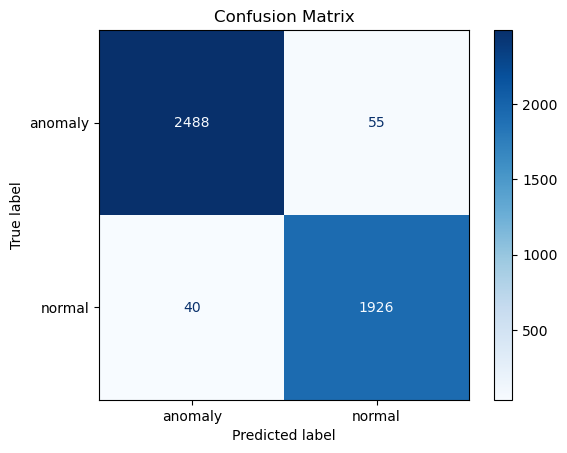

In [80]:
#Perfomance evaluation
# Assuming y_test and y_pred are your true labels and predicted labels respectively
cm = confusion_matrix(y_test1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1a.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### Case2 : Train = 10 % Test = 90%

In [81]:
# Split the dataset into training and test sets (10% train, 90% test)
#X and y have been determined above
X = df_num[top_features]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", x_train2.shape, y_train2.shape)
print("Test set shape:", x_test2.shape, y_test2.shape)

Training set shape: (2254, 5) (2254,)
Test set shape: (20287, 5) (20287,)


In [82]:
model2a = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model2a.fit(x_train2, y_train2)

# Predict on the test set
y_pred2 = model2a.predict(x_test2)

# Evaluate the model
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

     anomaly       0.97      0.98      0.97     11535
      normal       0.97      0.96      0.96      8752

    accuracy                           0.97     20287
   macro avg       0.97      0.97      0.97     20287
weighted avg       0.97      0.97      0.97     20287



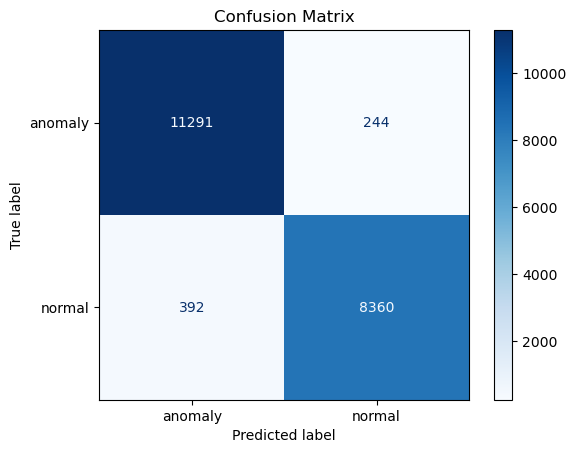

In [83]:
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2a.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Why Random Forest classifier?

Random Forest is a suitable choice for anomaly detection in this scenario due to several reasons:

1. **Robustness to Noise and Outliers**: Random Forest is robust to noisy data and outliers. It builds multiple decision trees on random subsets of the data and combines their predictions through voting or averaging, which helps reduce the impact of outliers on the overall model performance.


2. **Effective Feature Selection**: Random Forest inherently performs feature selection by evaluating the importance of features based on their contribution to the model's predictive performance. This can help in identifying the most relevant features for anomaly detection, especially in datasets with a large number of features. Here, we had around 33 numerical features, so to select top five features which will enhance the model performance, Random Forest classfier played a crucial role.


3. **Interpretability** :  Random Forest provides insights into feature importance, which can aid in understanding the underlying factors contributing to anomalies in the dataset. This interpretability can be valuable for domain experts to understand the network intrusions in a system.


4. **Handling Imbalanced Data**: Random Forest can handle imbalanced datasets effectively. Since we have imbalanced dataset where anomalies are more in the system, so random forest classifier was an optimal choice.

# Feature Selection for SVM Classifier

### Case1 : Train = 80 % Test = 20%
#### Feature selection based on 80% training data and 20% testing data

In [84]:
# Split the dataset into training and test sets
X= df_num
y= df_encoded

# Convert one-hot encoded target variable back to categorical labels
y = y.idxmax(axis=1)  # Convert one-hot encoded labels back to categorical labels

# Split the data into train and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top 5 features using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(x_train1, y_train1)
X_test_selected = selector.transform(x_test1)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

print("Top 5 selected features:")
selected_feature_names

Top 5 selected features:


Index(['logged_in', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_rerror_rate'],
      dtype='object')

In [38]:
X = df_num[selected_feature_names]
X.head()

,logged_in,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_rerror_rate
0,0.0,0.04,0.039216,0.04,1.00
1,0.0,0.01,0.003922,0.00,1.00
2,0.0,1.00,0.337255,0.61,0.00
3,0.0,1.00,0.223529,1.00,0.00
4,0.0,1.00,0.337255,0.31,0.83


### Model Building- SVM CLASSIFIER

In [85]:
# Create and train the SVM classifier model
#We use a linear kernel (kernel='linear')
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

model1b = SVC(kernel='linear', C=1.0, random_state=42) 
model1b.fit(x_train1, y_train1)

# Predict the classes for the test set
y_pred1 = model1b.predict(x_test1)

# Evaluate the model
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

     anomaly       0.87      0.90      0.89      2543
      normal       0.87      0.83      0.85      1966

    accuracy                           0.87      4509
   macro avg       0.87      0.86      0.87      4509
weighted avg       0.87      0.87      0.87      4509



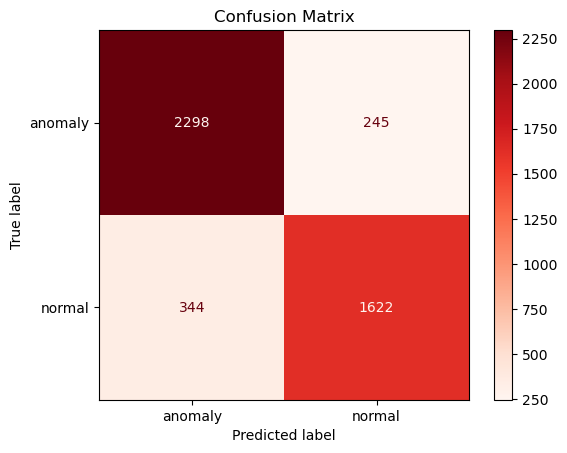

In [86]:
#Perfomance evaluation
cm = confusion_matrix(y_test1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1b.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

### Case 2 : Train = 10 % Test = 90%

#### Feature selection based on 10% training data and 90% testing data

In [87]:
# Split the dataset into training and test sets
X= df_num
y= df_encoded

# Convert one-hot encoded target variable back to categorical labels
y = y.idxmax(axis=1)  # Convert one-hot encoded labels back to categorical labels

# Split the data into train and test sets
x_train2, x_test2,y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)

# Select the top 5 features using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(x_train2, y_train2)
X_test_selected = selector.transform(x_test2)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

print("Top 5 selected features:")
print(selected_feature_names)

Top 5 selected features:
Index(['logged_in', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_rerror_rate'],
      dtype='object')


In [88]:
X = df_num[selected_feature_names]
X.head()

,logged_in,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_rerror_rate
0,0.0,0.04,0.039216,0.04,1.00
1,0.0,0.01,0.003922,0.00,1.00
2,0.0,1.00,0.337255,0.61,0.00
3,0.0,1.00,0.223529,1.00,0.00
4,0.0,1.00,0.337255,0.31,0.83


In [89]:
# Create and train the SVM classifier model
#We use a linear kernel (kernel='linear')
x_train2, x_test2,y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)
model2b = SVC(kernel='linear', C=1.0, random_state=42)  # Adjust parameters as needed
model2b.fit(x_train2, y_train2)

# Predict the classes for the test set
y_pred2 = model2b.predict(x_test2)

# Evaluate the model
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

     anomaly       0.82      0.86      0.84     11535
      normal       0.80      0.75      0.77      8752

    accuracy                           0.81     20287
   macro avg       0.81      0.80      0.81     20287
weighted avg       0.81      0.81      0.81     20287



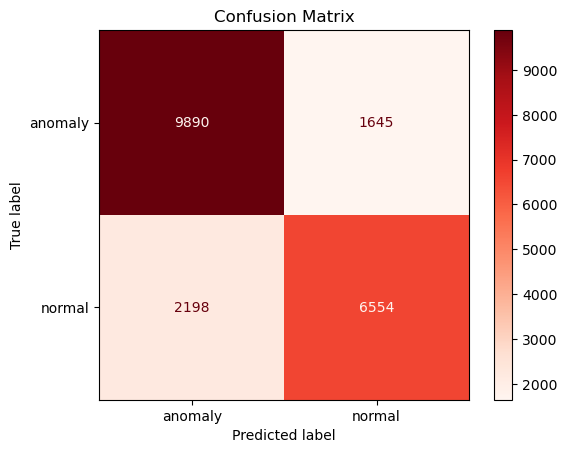

In [90]:
#Perfomance evaluation
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2b.classes_)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

### Why SVM classifier?

Support Vector Machines (SVMs) are considered effective classifiers for anomaly detection for several reasons:

- 1. **Ability to Handle Non-Linear Data**: SVMs are capable of capturing complex relationships between features and the target variable, making them suitable for detecting anomalies in non-linear data distributions.

- 2. **Margin Maximization**: SVMs aim to find the hyperplane that maximizes the margin between different classes. This margin-based approach helps SVMs generalize well to unseen data and improves their ability to detect anomalies.

### Which Training and Test dataset size is more suitable?

- As given in the assignment, the models using both algorithms were trained using different dataset sizes - 
 Case1 : Train = 80 % Test = 20% and Case2: Train = 10 % Test = 90%
 
- In both the models, we observed that overall **Case1 i.e (the dataset split into 80% training data and 20% test data) performed better**. This is because of the following reasons :

1. **More Balanced Training-Testing Split in Case 1**: In Case 1, a larger portion of the data (80%) is used for training, providing the model with more opportunities to learn from the data and capture its underlying patterns. With a more balanced training-testing split, the model is likely to generalize better to unseen data during testing. On the other hand,in case2, only 10% of the data is used for training, the model might not have enough data to learn the underlying patterns and relationships in the data effectively. With limited training data, the model may not generalize well to unseen data during testing, leading to poor performance.

2. **Reduced Risk of Overfitting in Case 1**: With a larger training set in Case 1, there is a reduced risk of overfitting compared to Case 2. The model trained on a larger dataset is more likely to capture the underlying patterns in the data without memorizing noise or specific characteristics of the training set. On the other hand, in case2, highly imbalanced training-testing split can lead to overfitting. When a model is trained on a small portion of the data and tested on a much larger portion, it may not be able to capture the true underlying distribution of the data. Overfitting can result in poor generalization performance on the test set.

3. **Risk of Bias in Model Evaluation in Case 2**: In Case 2, where the majority of the data is used for testing, the evaluation of the model might be biased towards the characteristics of the test set. If the test set is not representative of the overall distribution of the data, the model's performance metrics may not accurately reflect its true performance.

- Overall, for larger datasets(like the one in question) or simpler models, an 80-20 train-test split may be sufficient and provide a good balance between training and testing data. However, for smaller datasets or more complex models, a 10-90 train-test split may be preferable to ensure a more representative test set and more reliable estimates of model performance.

### Which Model performed better?

- In both the cases above with different sizes of training and testing dataset, we observe that **Random Forest Classifier** shows better classification report than the SVM classifier.

- Using Random Forest classifier, **model 1a(trained on 80% of data and tested on 20% of data)** performed better as compared to model 2a. The accuracy of model 1a(0.98) was more than accuracy of model 2a(0.97).

- Random Forests can model complex nonlinear relationships in the data more easily compared to linear SVMs. In anomaly detection, where anomalies may exhibit combinations of features(eg-duration for which the user was logged in and whether the user logged in was a guest or not), Random Forest's ability to handle non-linear relationships can be advantageous.

- Random Forests are robust to outliers and noise in the data due to their ensemble nature. In contrast, SVMs are sensitive to outliers, which can affect their performance.

- Random Forests have fewer hyperparameters to tune compared to SVMs. They are easier to use and less sensitive to hyperparameter choices. Tuning SVM hyperparameters such as the choice of kernel function and regularization parameter can be more challenging and time-consuming.

- SVMs are a better choice when the dataset is relatively small, and the decision boundary is well-defined and linearly separable. In the given dataset, there is a higher probability that the decision boundary between anomalies and normal instances will be nonlinear, so it becomes difficult for a linear SVM to perform better in such a scenario.

- Going forward, we will be taking model 1a as the final model, based on the performance.


### Performance Evalutaion

- The performance metrics for each of the models has been calculated after build in the Model Build section. A confusion matrix is also plotted for the same.
- The train-test split of 80-20 is an ideal choice for model build. Since the training data is more as compared to test data, this causes the model to train on large data and capture any underlying patterns in the dataset. This does not lead to any overfitiing or underfitting.

- On the other hand, the train test split of 10-90 leads to overfitting as the training data is less and testing data is more. Due to this, the model will try to capture any noise/outliers in the data, which will lead to overfitting and poor model performance in the model.

### K-fold cross validation

In [78]:
# Initialize the k-fold cross-validation
X = df_num # Features
y = df_encoded # Target variable

y = y.idxmax(axis=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Iterate over each fold
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train your model
    model = RandomForestClassifier(random_state=42) 
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score and append it to the list of cross-validation scores
    score = accuracy_score(y_test, y_pred)
    cv_scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = sum(cv_scores) / len(cv_scores)
std_accuracy = np.std(cv_scores)

# Display the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-validation scores for each fold: [0.985806165446884, 0.9877994676131322, 0.9842502218278616, 0.9835847382431233, 0.9838065661047027]
Mean Accuracy: 0.9850494318471409
Standard Deviation of Accuracy: 0.0015788680576605744


In [79]:
#Number of folds increased
# Initialize the k-fold cross-validation
X = df_num # Features
y = df_encoded # Target variable

y = y.idxmax(axis=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Iterate over each fold
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train your model
    model = RandomForestClassifier(random_state=42) 
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score and append it to the list of cross-validation scores
    score = accuracy_score(y_test, y_pred)
    cv_scores.append(score)

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = sum(cv_scores) / len(cv_scores)
std_accuracy = np.std(cv_scores)

# Display the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-validation scores for each fold: [0.9844789356984479, 0.9840283939662822, 0.9853593611357586, 0.9866903283052352, 0.9840283939662822, 0.984472049689441, 0.9835847382431233, 0.9853593611357586, 0.9822537710736469, 0.9840283939662822]
Mean Accuracy: 0.9844283727180259
Standard Deviation of Accuracy: 0.0011302630969713618


**Conclusion** : The relationship between the number of folds in k-fold cross-validation and the resulting scores is not necessarily straightforward. As demonstrated above, increasing the no. of fold to 10 also led to similar scores.

Also, we saw that when the no. of folds were less(5),  the cross-validation scores had high variance because the model was trained and evaluated on a limited number of data splits. 
This can lead to less stable estimates of model performance.

### REGULARIZATION

In [82]:
#WITHOUT REGULARIZATION IN RANDOM FOREST CLASSIFIER
X = df_num # Features
y = df_encoded # Target variable

y = y.idxmax(axis=1)

rf_model = RandomForestClassifier(random_state=42)  

# Calculate feature importances without training the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 5 features
top_features = importance_df.nlargest(5, 'Importance')['Feature']

X= df_num[top_features]

# Split the dataset into training and test sets (80% train, 20% test)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier model with regularization
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  

rf_classifier.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     anomaly       0.98      0.99      0.99      1295
      normal       0.99      0.97      0.98       959

    accuracy                           0.98      2254
   macro avg       0.98      0.98      0.98      2254
weighted avg       0.98      0.98      0.98      2254



In [83]:
#REGULARIZATION IN RANDOM FOREST CLASSIFIER

X= df_num # Features
y = df_encoded # Target variable

y = y.idxmax(axis=1)

rf_model = RandomForestClassifier(random_state=42)  

# Calculate feature importances without training the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 5 features
top_features = importance_df.nlargest(5, 'Importance')['Feature']

X= df_num[top_features]

# Split the dataset into training and test sets (80% train, 20% test)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier model with regularization
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)  

rf_classifier.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     anomaly       0.98      0.99      0.99      1295
      normal       0.99      0.98      0.98       959

    accuracy                           0.99      2254
   macro avg       0.99      0.99      0.99      2254
weighted avg       0.99      0.99      0.99      2254



### CONCLUSION:

- The max_depth parameter is increased to 20, allowing the trees to grow deeper and capture more complex patterns in the data. This can help address potential underfitting issues if the previous depth was too shallow. As seen from both of the above scenarios, adding regularization parameters to the classifier such as max_depth,min_samples_split,min_samples_leaf and max_features improved the model accuracy from 0.98 to 0.99.

- By increasing the min_samples_split can prevent the model from splitting nodes that have too few samples which can in turn   reduce the complexity of the trees.

- By default, the maximum depth of the decision trees in scikit-learn's RandomForestClassifier is set to None. This means that the trees are grown until all leaves are pure (i.e., they contain only samples from one class or have minimal variance in the case of regression) or until all leaves contain fewer samples than the min_samples_split parameter.

- Effectively, not setting a maximum depth allows the trees to grow without any constraints on their depth, potentially leading to fully grown trees if the stopping criteria (such as min_samples_split or min_samples_leaf) are not sufficient to prevent further splitting,as observed in the first situation where no regularization was used.

- With max_depth=None, it allows the trees to grow without any restrictions on depth, but it can lead to overfitting. Therefore, it is often recommended to set an appropriate maximum depth or use other regularization techniques to control the complexity of the trees and prevent overfitting.

### MODEL DEPLOYMENT

In [85]:
#As per the observations mentioned above, we will go ahead with model1a - random Forest classifier from case1. 

import pickle

# Assuming 'model' is your trained machine learning model
with open('models/model.pkl', 'wb') as f:
    pickle.dump(model1a, f)

In [45]:
!streamlit run streamlitapi.py

^C
